## Hypothesis Test

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [3]:
%%R
# import merged.csv using R

df <- read_csv('merged.csv', show_col_types = FALSE)

### Hypothesis Testing

H0: There is no difference in estimated median income and areas where there are landfills.

Ha: There is a difference in estimated median income and areas where there are landfills.
 

In [4]:
%%R
# create a new column that changes values of "Current Landfill Status" such that 'Open' is 1 and 'Closed' is 0 and 'Unknown' is NA
df <- df %>%
    mutate(status = case_when(
        `Current Landfill Status` == 'Open' ~ 1,
        `Current Landfill Status` == 'Closed' ~ 0,
        TRUE ~ NA_real_
    ))


In [5]:
%%R

# Clean up data to only get rows with variable = B19013_001 to only show median income
df <- df %>%
    filter(variable == 'B19013_001')

In [6]:
%%R

# t-test for Current Landfill Status and estimate

t.test(df$status, df$estimate, alternative = 'two.sided', mu = 0, paired = FALSE, conf.level = 0.95)


	Welch Two Sample t-test



data:  df$status and df$estimate
t = -16.295, df = 33, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -116635.92  -90743.05
sample estimates:
   mean of x    mean of y 
4.242424e-01 1.036899e+05 



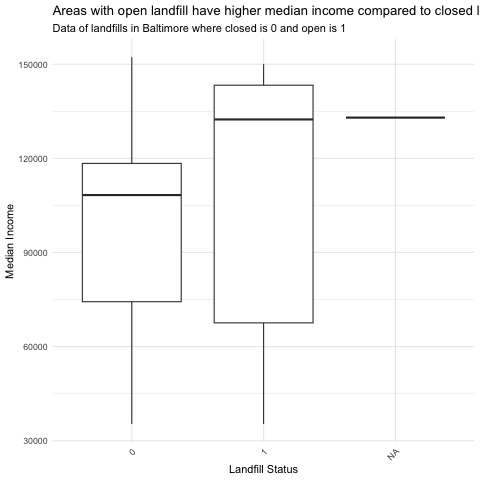

In [24]:
%%R

# create boxplot of estimate by Current Landfill Status whether it is open or closed

df %>%

    ggplot(aes(x = factor(status), y = estimate)) +
    geom_boxplot() +
    labs(title = 'Areas with open landfill have higher median income compared to closed landfills', subtitle = 'Data of landfills in Baltimore where closed is 0 and open is 1') +
    xlab('Landfill Status') +
    ylab('Median Income') +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1)
    )


### Results:

p-value = 2.2e-16

The null hypothesis is rejected because the p-value is low. There is a difference in estimated median income and areas where there are landfills. 

In [14]:
%%R

# change values of 'Ownership Type' such that 'Public' is 1 and 'Private' is 0 and 'Unknown' is NA
df <- df %>%
    mutate(ownership = case_when(
        `Ownership Type` == 'Public' ~ 0,
        `Ownership Type` == 'Private' ~ 1,
        TRUE ~ NA_real_
    ))

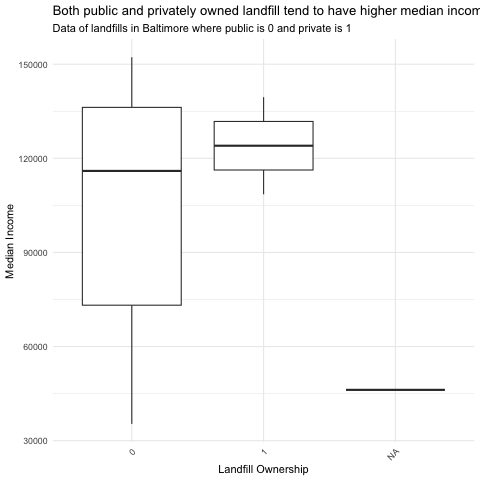

In [23]:
%%R

# boxplot of estimate by Ownership Type
# change values of 'Landfill Ownership' such that 'Private' is 1 and 'Public' is 0 and 'Unknown' is NA

df %>%
    ggplot(aes(x = factor(ownership), y = estimate)) +
    geom_boxplot() +
    labs(title = 'Both public and privately owned landfill tend to have higher median income', subtitle = 'Data of landfills in Baltimore where public is 0 and private is 1') +
    xlab('Landfill Ownership') +
    ylab('Median Income') +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1)
    )




In [19]:
%%R

# t-test for Ownership Type and estimate

t.test(df$ownership, df$estimate)


	Welch Two Sample t-test

data:  df$ownership and df$estimate
t = -16.295, df = 33, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -116636.29  -90743.42
sample estimates:
   mean of x    mean of y 
6.060606e-02 1.036899e+05 



p-value = 2.2e-16

The null hypothesis is rejected because the p-value is low. There is a difference in estimated median income and types of ownership. 

In [25]:
%%R

# create a cross table of 'Current Landfill Status' and 'Ownership Type' drop nulls

df %>%
    drop_na() %>%
    count(`Current Landfill Status`, `Ownership Type`) %>%
    spread(`Current Landfill Status`, n)
    

# A tibble: 0 × 1
# ℹ 1 variable: Ownership Type <chr>


In [26]:
%%R

# create chi-squared test for 'Current Landfill Status' and 'Ownership Type' drop nulls

chisq.test(df$`Current Landfill Status`, df$`Ownership Type`)


	Pearson's Chi-squared test

data:  df$`Current Landfill Status` and df$`Ownership Type`
X-squared = 0.91741, df = 4, p-value = 0.922



In addition: Warning message:
In chisq.test(df$`Current Landfill Status`, df$`Ownership Type`) :
  Chi-squared approximation may be incorrect


In [29]:
%%R
# count Current Landfill Status and Ownership Type
df %>%
    count(`Current Landfill Status`, `Ownership Type`)

# A tibble: 6 × 3
  `Current Landfill Status` `Ownership Type`     n
  <chr>                     <chr>            <int>
1 Closed                    Private              1
2 Closed                    Public              17
3 Closed                    Unknown              1
4 Open                      Private              1
5 Open                      Public              13
6 Unknown                   Public               1
